In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv(r'E:\Self study\Data\Automobile_data.csv' , na_values= '?')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# categorical ( Nominal )

In [4]:
data['make'].describe()

count        205
unique        22
top       toyota
freq          32
Name: make, dtype: object

In [5]:
(data['make'].value_counts(ascending = False)/data.shape[0])*100

toyota           15.609756
nissan            8.780488
mazda             8.292683
mitsubishi        6.341463
honda             6.341463
volkswagen        5.853659
subaru            5.853659
volvo             5.365854
peugot            5.365854
dodge             4.390244
mercedes-benz     3.902439
bmw               3.902439
audi              3.414634
plymouth          3.414634
saab              2.926829
porsche           2.439024
isuzu             1.951220
alfa-romero       1.463415
jaguar            1.463415
chevrolet         1.463415
renault           0.975610
mercury           0.487805
Name: make, dtype: float64

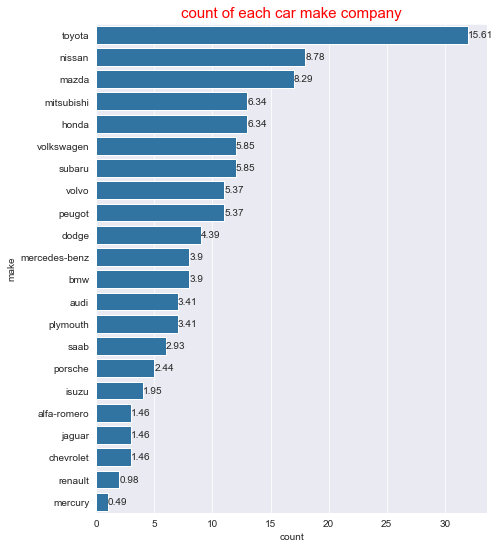

In [6]:
make_index = data['make'].value_counts(ascending = False).index 
total = data.shape[0]
sns.set_style('darkgrid')
base_color = sns.color_palette()[0]

make_values = data['make'].value_counts(ascending = False).values
plt.figure(figsize=(7,9))
sns.countplot(y='make',data = data,color=base_color ,order = make_index)
plt.title('count of each car make company',color = 'r',fontsize= 15);

for y ,x in enumerate(make_values):
    pct_string = f"{round((x/total)*100,2)}" #round each value to get percent to nearest two decimal
    plt.text(x , y , pct_string , va='center') #to display values after each bar at center

In [7]:
data['fuel-system'].value_counts(ascending = False).index  

Index(['mpfi', '2bbl', 'idi', '1bbl', 'spdi', '4bbl', 'spfi', 'mfi'], dtype='object')

In [8]:
data['fuel-system'].value_counts(ascending = False).values

array([94, 66, 20, 11,  9,  3,  1,  1], dtype=int64)

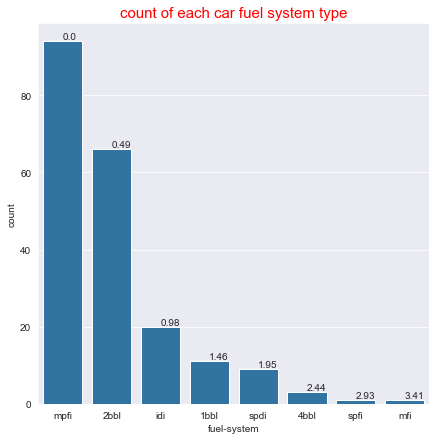

In [9]:
fuel_index = data['fuel-system'].value_counts(ascending = False).index 
total = data.shape[0]
sns.set_style('darkgrid')
base_color = sns.color_palette()[0]

fuel_values = data['fuel-system'].value_counts(ascending = False).values
plt.figure(figsize=(7,7))
sns.countplot(x='fuel-system',data = data,color=base_color ,order = fuel_index)
plt.title('count of each car fuel system type',color = 'r',fontsize= 15);

for x ,y in enumerate(fuel_values):
    pct_string = f"{round((x/total)*100,2)}"
    plt.text(x , y , pct_string , va='bottom') 

# Categorical (Binary)

In [10]:
data['fuel-type'].value_counts(ascending = False).index

Index(['gas', 'diesel'], dtype='object')

Text(0.5, 1.0, 'Fuel type count')

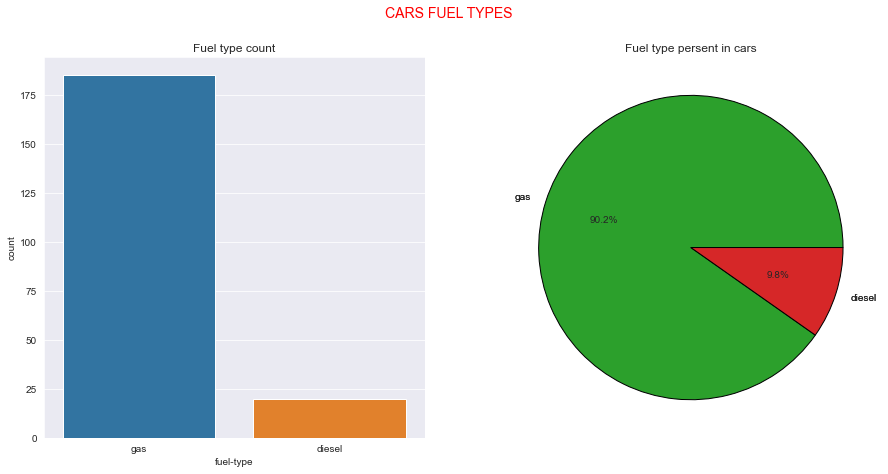

In [28]:
gas_index = data['fuel-type'].value_counts(ascending = False).index 
gas_values = data['fuel-type'].value_counts(ascending = False).values
labels = gas_index
fig , axis = plt.subplots(1,2,figsize=(15,7))
sns.countplot(x = data['fuel-type'] , ax= axis [0])
plt.pie(gas_values  ,labels = labels,startangle=0 , autopct = '%1.1f%%' ) 
plt.pie(gas_values,labels = labels , wedgeprops={'edgecolor' : 'black'})
plt.title("Fuel type persent in cars")
plt.suptitle("CARS FUEL TYPES" , color = 'r' , size = 14)
axis[0].set_title('Fuel type count')


# Numerical (Discrete)

In [12]:
data['horsepower'].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [13]:
horsepower_median = data["horsepower"].median()

In [14]:
data[data['horsepower']<140]['horsepower'].mean()

88.12269938650307

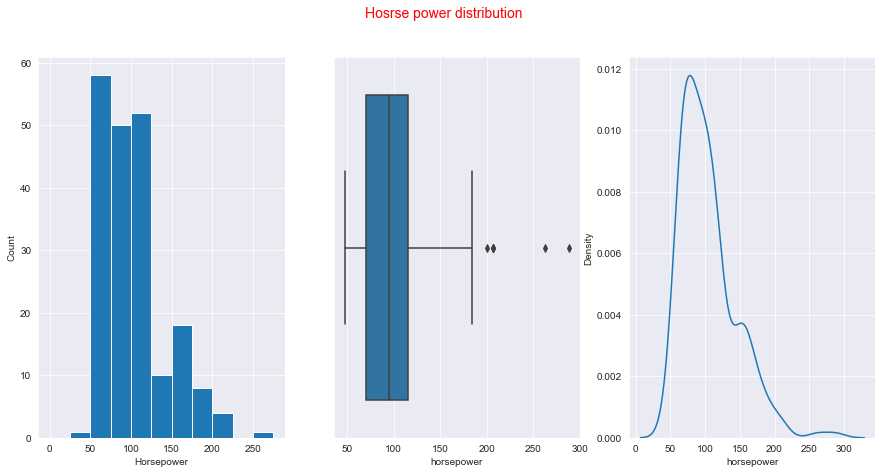

In [15]:
fig , axis = plt.subplots(1,3,figsize=(15,7))
horsepower_bins = np.arange(0,300,25)
data['horsepower'].hist(bins = horsepower_bins,ax= axis [0])
axis[0].set_xlabel("Horsepower")
axis[0].set_ylabel("Count")
plt.suptitle("Hosrse power distribution" , color = 'r' , size = 14)
sns.kdeplot(data.horsepower);
sns.boxplot(data = data,x="horsepower",ax= axis [1]);

### we realize that some cars got horsepower from 50-120 and some at 160

In [16]:
data['normalized-losses'].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

In [17]:
data['normalized-losses'].unique()

array([ nan, 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 122., 103., 168., 108.,
       194., 231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,
        91., 134.,  65., 197.,  90.,  94., 256.,  95.])

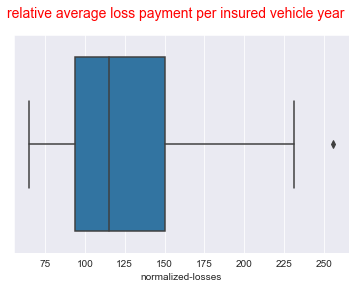

In [18]:
sns.boxplot(data = data , x= 'normalized-losses')
plt.suptitle("relative average loss payment per insured vehicle year" , color = 'r' , size = 14);

Text(0.5, 1.0, 'Highway mpg')

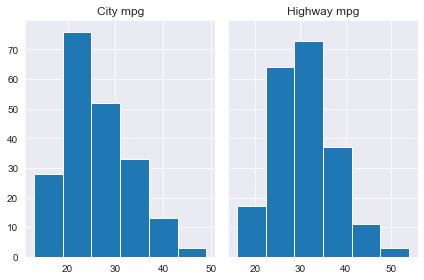

In [29]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(data['city-mpg'], bins = 6)
axs[1].hist(data['highway-mpg'], bins = 6)
axs[0].set_title("City mpg")
axs[1].set_title("Highway mpg");

# Numerical (Continuous)

In [19]:
data[['length', 'width', 'height']].describe()

,length,width,height
count,205.000000,205.000000,205.000000
mean,174.049268,65.907805,53.724878
std,12.337289,2.145204,2.443522
min,141.100000,60.300000,47.800000
25%,166.300000,64.100000,52.000000
50%,173.200000,65.500000,54.100000
75%,183.100000,66.900000,55.500000
max,208.100000,72.300000,59.800000


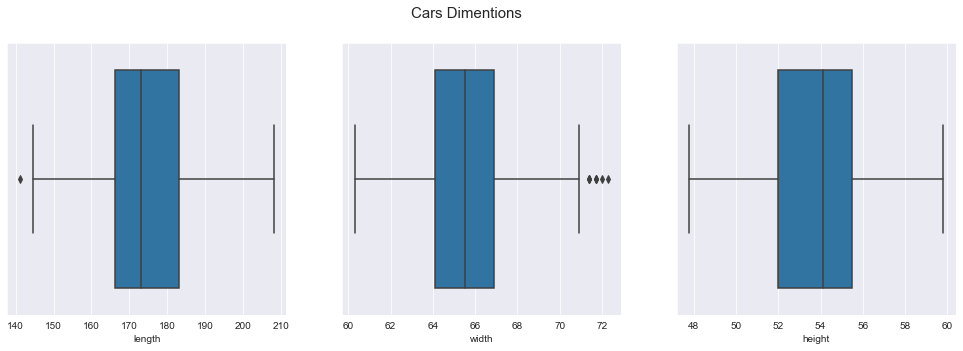

In [20]:
fig , axis = plt.subplots(1,3,figsize=(17,5))
sns.boxplot(data = data,x="length",ax= axis [0])
sns.boxplot(data = data,x="width",ax= axis [1])
sns.boxplot(data = data,x="height",ax= axis [2])
plt.suptitle("Cars Dimentions",fontsize = 15);

### Cars length tends to be near 175 , Width near 65 and hight near 54

# BIVARIATE

# Relation between horsepower and price

C:\Users\Ghazy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


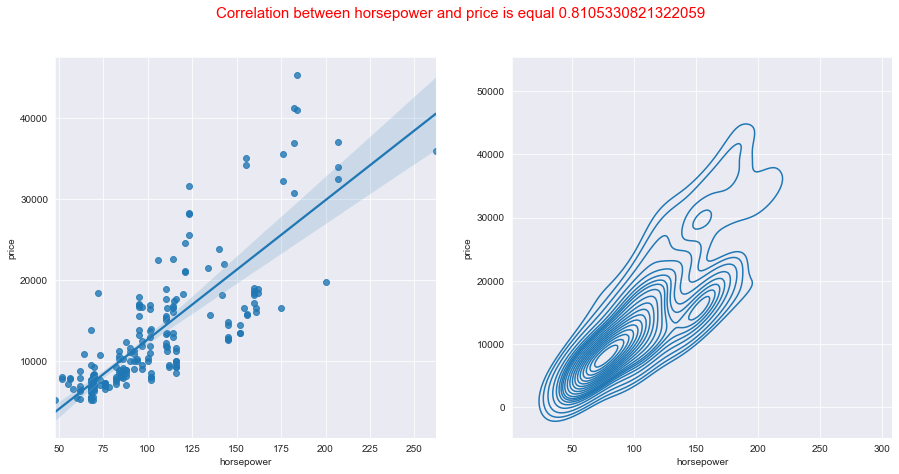

In [21]:
fig , axis = plt.subplots(1,2,figsize=(15,7))
sns.regplot(data=data, x="horsepower", y="price" , ax= axis [0])
sns.kdeplot(data.horsepower, data.price, n_levels = 20,ax= axis[1]);
corr = data["horsepower"].corr(data['price'])
plt.suptitle("Correlation between horsepower and price is equal {}".format(corr), fontsize = 15 , color = 'r');

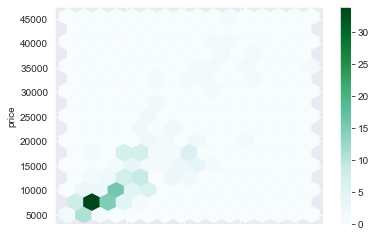

In [22]:
data.plot.hexbin(x = "horsepower" , y= "price" ,gridsize= 15 , sharex = True);

# Relation between engine type and price

<AxesSubplot:xlabel='engine-type', ylabel='price'>

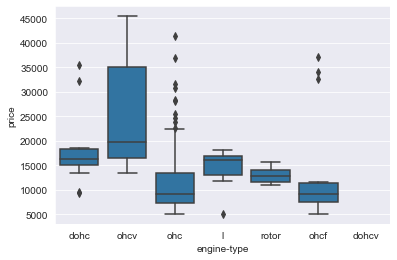

In [23]:
color = sns.color_palette()[0]
sns.boxplot(x = data["engine-type"] , y = data["price"] ,  color = color)

# Prices distripution of body styles

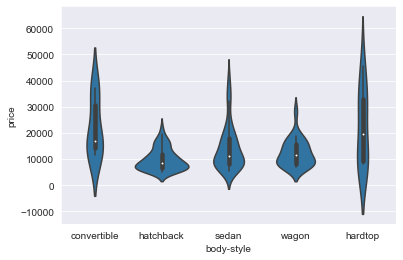

In [24]:
sns.violinplot(data=data , x = "body-style", y = "price" , color = color);

# prices of each Company

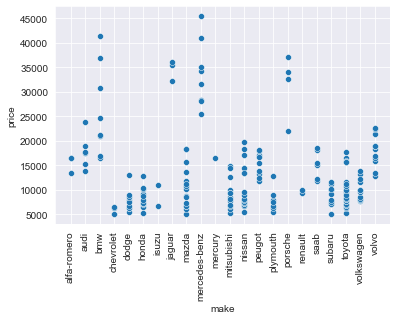

In [25]:
sns.scatterplot(data=data , x= "make" , y = "price" , color = color)
plt.xticks(rotation = 90);

## Is there a relation between stroke and horsepower?🤔

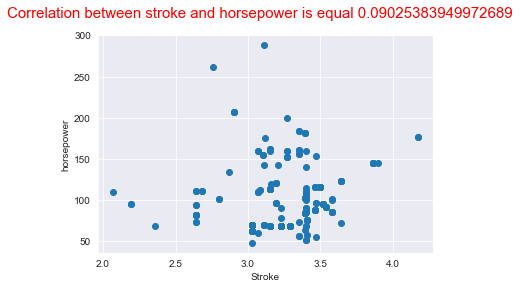

In [26]:
plt.scatter(data['stroke'],data['horsepower'])
plt.xlabel("Stroke")
plt.ylabel("horsepower")
corr = data["stroke"].corr(data['horsepower'])
plt.suptitle("Correlation between stroke and horsepower is equal {}".format(corr), fontsize = 15 , color = 'r');

## From graph and correlation value we realize that there is no correlation.